In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
df = pd.read_csv("cc.csv")

In [3]:
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace("-","_")
df.columns = df.columns.str.lower()

In [4]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [5]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zip_code                        object
tags                            object
consumer_consent_provided?      object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response?                object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [6]:
df['product'].unique()

array(['Credit reporting', 'Debt collection', 'Credit card', 'Mortgage',
       'Bank account or service', 'Student loan', 'Money transfers',
       'Consumer Loan', 'Prepaid card', 'Other financial service',
       'Payday loan',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account',
       'Payday loan, title loan, or personal loan',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Virtual currency'], dtype=object)

In [7]:
loan_col= ['Debt collection','Mortgage','Student loan','Consumer Loan','Payday loan','Payday loan, title loan, or personal loan','Vehicle loan or lease','Bank account or service']

In [8]:
df_l_c =df[df['product'].isin (loan_col)]

In [9]:
df_l_c.shape

(532928, 18)

In [10]:
df_l_c.T.head

<bound method NDFrame.head of                                                               1       \
date_received                                             04/19/2017   
product                                              Debt collection   
sub_product                    Other (i.e. phone, health club, etc.)   
issue                                Disclosure verification of debt   
sub_issue                     Not disclosed as an attempt to collect   
consumer_complaint_narrative                                     NaN   
company_public_response                                          NaN   
company                                Security Credit Services, LLC   
state                                                             IL   
zip_code                                                       60643   
tags                                                             NaN   
consumer_consent_provided?                                       NaN   
submitted_via                     

In [11]:
df_l_c.isnull().sum()

date_received                        0
product                              0
sub_product                       5543
issue                                0
sub_issue                       357356
consumer_complaint_narrative    426787
company_public_response         414104
company                              0
state                             4320
zip_code                          4352
tags                            456926
consumer_consent_provided?      348501
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response?                     0
consumer_disputed?                4351
complaint_id                         0
dtype: int64

In [12]:
df_l_c.sub_product=df_l_c.sub_product.str.replace(" ","_")
df_l_c.sub_product=df_l_c.sub_product.str.lower()

C:\Users\dall\AppData\Local\Temp\ipykernel_7988\1347063932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l_c.sub_product=df_l_c.sub_product.str.replace(" ","_")
C:\Users\dall\AppData\Local\Temp\ipykernel_7988\1347063932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l_c.sub_product=df_l_c.sub_product.str.lower()


In [13]:
df_l_c.sub_product.unique()

array(['other_(i.e._phone,_health_club,_etc.)', 'other_mortgage',
       'checking_account', 'conventional_fixed_mortgage',
       'federal_student_loan_servicing',
       'conventional_adjustable_mortgage_(arm)',
       '(cd)_certificate_of_deposit', 'other_bank_product/service',
       'non-federal_student_loan', 'vehicle_loan', 'installment_loan',
       'payday_loan', 'auto', 'credit_card', 'fha_mortgage', 'medical',
       'home_equity_loan_or_line_of_credit', 'mortgage', 'i_do_not_know',
       'vehicle_lease', 'savings_account', 'pawn_loan',
       'cashing_a_check_without_an_account', 'personal_line_of_credit',
       'federal_student_loan', nan, 'other_type_of_mortgage',
       'reverse_mortgage', 'va_mortgage', 'title_loan',
       'conventional_home_mortgage', 'medical_debt', 'credit_card_debt',
       'other_debt', 'payday_loan_debt', 'private_student_loan_debt',
       'federal_student_loan_debt', 'loan', 'mortgage_debt', 'auto_debt',
       'home_equity_loan_or_line_of_cr

In [14]:
# for i in loan_col:
#     print(df_l_c[df_l_c[df['product'] is i]].sub_product)

In [15]:
df_l_c[df_l_c['product'] == 'Consumer Loan'].sub_product.unique()

array(['vehicle_loan', 'installment_loan', 'vehicle_lease', 'pawn_loan',
       'personal_line_of_credit', 'title_loan'], dtype=object)

In [16]:
sub_arr= df_l_c['sub_product'].unique()

In [17]:
sub_arr

array(['other_(i.e._phone,_health_club,_etc.)', 'other_mortgage',
       'checking_account', 'conventional_fixed_mortgage',
       'federal_student_loan_servicing',
       'conventional_adjustable_mortgage_(arm)',
       '(cd)_certificate_of_deposit', 'other_bank_product/service',
       'non-federal_student_loan', 'vehicle_loan', 'installment_loan',
       'payday_loan', 'auto', 'credit_card', 'fha_mortgage', 'medical',
       'home_equity_loan_or_line_of_credit', 'mortgage', 'i_do_not_know',
       'vehicle_lease', 'savings_account', 'pawn_loan',
       'cashing_a_check_without_an_account', 'personal_line_of_credit',
       'federal_student_loan', nan, 'other_type_of_mortgage',
       'reverse_mortgage', 'va_mortgage', 'title_loan',
       'conventional_home_mortgage', 'medical_debt', 'credit_card_debt',
       'other_debt', 'payday_loan_debt', 'private_student_loan_debt',
       'federal_student_loan_debt', 'loan', 'mortgage_debt', 'auto_debt',
       'home_equity_loan_or_line_of_cr

In [18]:
df['product'].value_counts()

Mortgage                                                                        228167
Debt collection                                                                 148016
Credit reporting                                                                140405
Credit card                                                                      89189
Bank account or service                                                          86206
Student loan                                                                     33044
Consumer Loan                                                                    31591
Payday loan                                                                       5543
Money transfers                                                                   5355
Prepaid card                                                                      3817
Credit reporting, credit repair services, or other personal consumer reports      3490
Other financial service                    

In [19]:

df['product'].nunique()

18

In [20]:
issue= df_l_c.issue.unique()

In [21]:
a= ['Debt collection', 'Mortgage', 'Student loan','Consumer Loan','Payday loan',
         'Payday loan, title loan, or personal loan','Vehicle loan or lease','Bank account or service']

In [22]:
sub_prod=['other_(i.e._phone,_health_club,_etc.)', 'other_mortgage',
       'conventional_fixed_mortgage', 'federal_student_loan_servicing',
       'conventional_adjustable_mortgage_(arm)',
       'non-federal_student_loan', 'vehicle_loan', 'installment_loan',
       'payday_loan', 'auto', 'credit_card', 'fha_mortgage', 'medical',
       'home_equity_loan_or_line_of_credit', 'mortgage', 'i_do_not_know',
       'vehicle_lease', 'pawn_loan', 'personal_line_of_credit',
       'federal_student_loan', 'nan', 'other_type_of_mortgage',
       'reverse_mortgage', 'va_mortgage', 'title_loan',
       'conventional_home_mortgage', 'medical_debt', 'credit_card_debt',
       'other_debt', 'payday_loan_debt', 'private_student_loan_debt',
       'federal_student_loan_debt', 'loan', 'mortgage_debt', 'auto_debt',
       'home_equity_loan_or_line_of_credit_(heloc)', 'lease',
       'private_student_loan', 'second_mortgage']

In [23]:
def product_subproduct(b):    
    fig = plt.figure()
    plt.yticks(fontsize = 20)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    y_axis= df_l_c[df_l_c['product'] == b].sub_product.value_counts()
    print(df_l_c[df_l_c['product'] == b].sub_product.value_counts())
    x_axis= df_l_c[df_l_c['product'] == b].sub_product.unique()
    plt.barh(x_axis,y_axis)



In [24]:
def product_issue(b):
    fig = plt.figure()
    plt.yticks(fontsize = 20)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    y_axis= df_l_c[df_l_c['product'] == b].issue.value_counts()
    print(df_l_c[df_l_c['product'] == b].issue.value_counts())
    x_axis= df_l_c[df_l_c['product'] == b].issue.unique()
    plt.barh(x_axis,y_axis)
    

In [40]:
def sub_product_issue(sub):
    fig = plt.figure()
    plt.yticks(fontsize = 20)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    y_axis= df_l_c[df_l_c['sub_product'] == sub].issue.value_counts()
    print(df_l_c[df_l_c['sub_product'] == sub].issue.value_counts())
    x_axis= df_l_c[df_l_c['sub_product'] == sub].issue.unique()
    p1=plt.barh(x_axis,y_axis)
    plt.show()

In [41]:
def issue_sub_issue(sub1):
    fig = plt.figure()
    plt.yticks(fontsize = 20)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    y_axis= df_l_c[df_l_c['issue'] == sub1].sub_issue.value_counts()
    print(df_l_c[df_l_c['issue'] == sub1].sub_issue.value_counts())
    x_axis= df_l_c[df_l_c['issue'] == sub1].sub_issue.unique()
    p1=plt.barh(x_axis,y_axis)
    plt.show()

In [42]:
#product to sub_product
widgets.interact(product_subproduct,b=a)

interactive(children=(Dropdown(description='b', options=('Debt collection', 'Mortgage', 'Student loan', 'Consu…

<function __main__.product_subproduct(b)>

In [43]:
#sub_product to Issues
widgets.interactive(sub_product_issue,sub=sub_prod)

interactive(children=(Dropdown(description='sub', options=('other_(i.e._phone,_health_club,_etc.)', 'other_mor…

In [44]:
#product to Issues
widgets.interactive(product_issue,b=a)

interactive(children=(Dropdown(description='b', options=('Debt collection', 'Mortgage', 'Student loan', 'Consu…

In [45]:
widgets.interactive(issue_sub_issue,sub1=issue)

interactive(children=(Dropdown(description='sub1', options=('Disclosure verification of debt', 'Loan modificat…

In [46]:
df_l_c[df_l_c['product'] =='Mortgage'].issue.unique()

array(['Loan modification,collection,foreclosure',
       'Loan servicing, payments, escrow account',
       'Settlement process and costs', 'Other',
       'Application, originator, mortgage broker',
       'Struggling to pay mortgage', 'Credit decision / Underwriting',
       'Trouble during payment process',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Closing on a mortgage', 'Incorrect information on your report',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Credit monitoring or identity theft protection services',
       'Applying for a mortgage',
       'Unable to get your credit report or credit score'], dtype=object)

In [47]:
df_l_c.columns


Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [48]:
colls=['product','sub_product']

In [49]:
df_l_c.groupby('product').sub_product.value_counts(normalize =True)

product                                    sub_product                               
Bank account or service                    checking_account                              0.684964
                                           other_bank_product/service                    0.206726
                                           savings_account                               0.061423
                                           (cd)_certificate_of_deposit                   0.039638
                                           cashing_a_check_without_an_account            0.007250
Consumer Loan                              vehicle_loan                                  0.562534
                                           installment_loan                              0.275363
                                           vehicle_lease                                 0.084043
                                           personal_line_of_credit                       0.057770
                                

In [50]:
df_l_c.groupby(['product']).issue.value_counts(normalize =True)

product                  issue                                                                           
Bank account or service  Account opening, closing, or management                                             0.440364
                         Deposits and withdrawals                                                            0.265063
                         Problems caused by my funds being low                                               0.137403
                         Making/receiving payments, sending money                                            0.085887
                         Using a debit or ATM card                                                           0.071283
                                                                                                               ...   
Vehicle loan or lease    Problems at the end of the loan or lease                                            0.199095
                         Getting a loan or lease                    

In [51]:
y=df_l_c.groupby('product').count()
y

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
product,,,,,,,,,,,,,,,,,
Bank account or service,86206,86206,86206,0,14500,24013,86206,84650,84643,11826,23443,86206,86206,86206,86206,86206,86206
Consumer Loan,31591,31591,31591,0,9029,7707,31591,31411,31411,5225,14705,31591,31591,31591,31591,31591,31591
Debt collection,148016,148016,148016,148016,38741,38682,148016,147198,147189,23974,68937,148016,148016,148016,148016,145839,148016
Mortgage,228167,228167,228167,0,32000,43425,228167,226630,226615,31416,56784,228167,228167,228167,228167,226887,228167
Payday loan,5543,0,5543,0,1695,1086,5543,5523,5523,929,2898,5543,5543,5543,5543,5543,5543
"Payday loan, title loan, or personal loan",140,140,140,13,0,38,140,138,137,28,12,140,140,140,140,0,140
Student loan,33044,33044,33044,27322,10176,3827,33044,32842,32842,2568,17636,33044,33044,33044,33044,32511,33044
Vehicle loan or lease,221,221,221,221,0,46,221,216,216,36,12,221,221,221,221,0,221


In [52]:
df_l_c[df_l_c['product']=='Debt collection'].issue.value_counts()
    

Cont'd attempts collect debt not owed                            60698
Disclosure verification of debt                                  30796
Communication tactics                                            24073
False statements or representation                               11819
Improper contact or sharing of info                              10068
Taking/threatening an illegal action                              8874
Attempts to collect debt not owed                                  915
Written notification about debt                                    473
Took or threatened to take negative or legal action                235
Threatened to contact someone or share information improperly       65
Name: issue, dtype: int64

In [53]:
colss=['Virtual currency','Bank account or service','Other financial service','Money transfers',
       'Money transfer, virtual currency, or money service','Checking or savings account'
      ]


In [54]:


co= colss + loan_col
print(co)

['Virtual currency', 'Bank account or service', 'Other financial service', 'Money transfers', 'Money transfer, virtual currency, or money service', 'Checking or savings account', 'Debt collection', 'Mortgage', 'Student loan', 'Consumer Loan', 'Payday loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Bank account or service']


In [55]:
df_l_a =df[~df['product'].isin (co)]
df_l_a

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726
21,03-04-2017,Credit reporting,NaN,Credit reporting company's investigation,Investigation took too long,NaN,NaN,"EQUIFAX, INC.",CA,92683,NaN,Consent not provided,Web,03-04-2017,Closed with explanation,Yes,No,2371648
23,04-06-2017,Credit card,NaN,Other fee,NaN,NaN,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,VA,22315,Servicemember,Consent not provided,Web,04-06-2017,Closed with explanation,Yes,No,2423410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777938,02-08-2016,Credit card,NaN,Closing/Cancelling account,NaN,NaN,Company chooses not to provide a public response,BB&T CORPORATION,VA,20182,NaN,Consent not provided,Web,02-08-2016,Closed with explanation,Yes,No,1777443
777943,01/31/2013,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,EXPERIAN DELAWARE GP,IL,60085,NaN,NaN,Referral,02/27/2013,Closed with explanation,Yes,No,280845
777946,03-03-2014,Credit reporting,NaN,Incorrect information on credit report,Public record,NaN,NaN,EXPERIAN DELAWARE GP,NaN,NaN,NaN,NaN,Web,03-05-2014,Closed with explanation,Yes,No,740309
777947,03-08-2016,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",TX,75022,NaN,Consent not provided,Web,03-09-2016,Closed with explanation,Yes,Yes,1823238


In [56]:
df_l_a['product'].value_counts()

Credit reporting                                                                140405
Credit card                                                                      89189
Prepaid card                                                                      3817
Credit reporting, credit repair services, or other personal consumer reports      3490
Credit card or prepaid card                                                        919
Name: product, dtype: int64

In [57]:
df_l_a[df_l_a['product']=='Credit reporting'].issue.value_counts()

Incorrect information on credit report      102667
Credit reporting company's investigation     16880
Unable to get credit report/credit score     10855
Improper use of my credit report              5578
Credit monitoring or identity protection      4425
Name: issue, dtype: int64

In [58]:
cols=['Mortgage','Debt collection','Credit reporting','Bank account or service','Credit card']
dfs= df[df['product'].isin (cols)]

In [59]:
dfs.shape

(691983, 18)

In [60]:
#dfs.to_csv("dfs1.csv")

In [61]:
#dfs=dfs.drop(['complaint_id','date_received','zip_code','tags','submitted_via','date_sent_to_company','consumer_disputed?','consumer_complaint_narrative'],axis=1)

In [62]:
#dfs.head()

In [63]:
a=dfs.groupby('company').count()

In [64]:
a= a.reset_index()
#a=a.drop('index',axis=1)

In [65]:
dfs

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777954,12/21/2016,Credit card,NaN,Other fee,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,NY,11743,NaN,NaN,Referral,12/22/2016,Closed with monetary relief,Yes,No,2259452
777955,06/28/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"ARVEST BANK GROUP, INC.",NY,11423,NaN,NaN,Referral,07-02-2013,Closed with explanation,Yes,No,445400
777956,02/13/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",DE,19803,NaN,NaN,Referral,02/15/2013,Closed with non-monetary relief,Yes,No,317273
777957,09/15/2014,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Ditech Financial LLC,MO,64053,NaN,NaN,Web,09/19/2014,Closed with explanation,Yes,Yes,1029658


In [66]:
#dfs.date_received= dfs.date_received.str.replace("/","-")

In [67]:
#dfs.columns

In [68]:
#dfs =dfs.reset_index()


In [69]:
#dfs=dfs.drop('index',axis=1)

In [70]:
#min(dfs.date_received)
#max(dfs.date_received)

In [71]:
df['date_received'] =pd.to_datetime(df['date_received'])
df['date_sent_to_company']= pd.to_datetime(df['date_sent_to_company'])

In [72]:
year_complained= df.groupby(df.date_received.dt.year)['product'].count()

In [73]:
df.groupby(df.date_received.dt.month)['product'].count()

date_received
1     73076
2     69841
3     79811
4     75588
5     62027
6     58988
7     61408
8     63099
9     59521
10    61614
11    54824
12    58162
Name: product, dtype: int64

In [74]:
cols= df.columns
def unique_values(prod):
    print(df[prod].value_counts(normalize= True))

In [75]:
widgets.interactive(unique_values,prod=cols)

interactive(children=(Dropdown(description='prod', options=('date_received', 'product', 'sub_product', 'issue'…

In [76]:
df[df['timely_response?']=='No']['product'].value_counts()

Debt collection                                                                 10840
Mortgage                                                                         4807
Bank account or service                                                          2231
Consumer Loan                                                                    1259
Credit card                                                                       983
Payday loan                                                                       604
Student loan                                                                      417
Credit reporting                                                                  302
Money transfers                                                                   148
Other financial service                                                           111
Prepaid card                                                                       52
Credit reporting, credit repair services, or other per

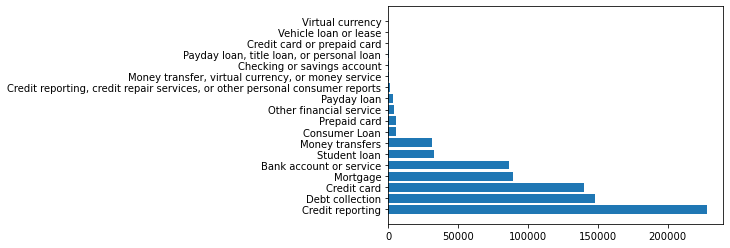

In [77]:
plt.ylabel=("Product")
plt.barh(df['product'].unique(),df['product'].value_counts())

plt.show()

In [78]:
df['product'].value_counts(normalize=True)

Mortgage                                                                        0.293289
Debt collection                                                                 0.190262
Credit reporting                                                                0.180479
Credit card                                                                     0.114645
Bank account or service                                                         0.110810
Student loan                                                                    0.042475
Consumer Loan                                                                   0.040608
Payday loan                                                                     0.007125
Money transfers                                                                 0.006883
Prepaid card                                                                    0.004906
Credit reporting, credit repair services, or other personal consumer reports    0.004486
Other financial servi

In [79]:
dfx =df[df['product']=="Debt collection"]

In [80]:
dfx.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
1,2017-04-19,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,2017-04-20,Closed with explanation,Yes,No,2441777
5,2017-04-18,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"Rubin & Rothman, LLC",NY,14063,NaN,NaN,Referral,2017-04-19,In progress,Yes,No,2440364
12,2016-11-17,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"PMGI, LLC",CA,92356,NaN,NaN,Postal mail,2016-11-18,Closed with non-monetary relief,No,No,2214174
25,2017-03-04,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Talked to a third party about my debt,NaN,NaN,Resurgent Capital Services L.P.,TX,75686,NaN,Consent not provided,Web,2017-03-04,Closed with explanation,Yes,No,2371815
29,2017-04-21,Debt collection,Payday loan,Disclosure verification of debt,Right to dispute notice not received,NaN,NaN,SPEEDY CASH INTERMEDIATE HOLDINGS CORP,TX,773XX,NaN,NaN,Web,2017-04-21,Closed with explanation,Yes,No,2444768


In [81]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [82]:
crc1=df['company_response_to_consumer'].unique()

In [83]:
df['company_response_to_consumer'].value_counts()

Closed with explanation            581562
Closed with non-monetary relief     95957
Closed with monetary relief         51581
Closed without relief               17868
Closed                              17611
Closed with relief                   5304
In progress                          4382
Untimely response                    3694
Name: company_response_to_consumer, dtype: int64

In [84]:
def crc_product(crc):
    print("crc count",df[df['company_response_to_consumer']==crc].count(axis=0))
    print("product count",df[df['company_response_to_consumer']==crc]['product'].value_counts())

In [85]:
widgets.interactive(crc_product,crc=crc1)

interactive(children=(Dropdown(description='crc', options=('Closed with non-monetary relief', 'Closed with exp…

In [86]:
comp=df['company'].value_counts()
#print(comp)
comp.loc[comp< 10000].count()
comp.loc[comp >45000].count()
#comp.shape


4

In [87]:
df['company'].nunique()

4224

In [88]:
comp_y=df[df['timely_response?']=='No']['company'].value_counts()
comp_y.loc[comp_y > 300]

WELLS FARGO BANK, NATIONAL ASSOCIATION    2644
BANK OF AMERICA, NATIONAL ASSOCIATION     1563
OCWEN LOAN SERVICING LLC                   542
CITIBANK, N.A.                             345
Name: company, dtype: int64

In [89]:
df.submitted_via.value_counts()

Web            531019
Referral       133730
Phone           52610
Postal mail     49258
Fax             10994
Email             348
Name: submitted_via, dtype: int64

In [90]:
df.tags.value_counts()

Older American                   62171
Servicemember                    38380
Older American, Servicemember     8713
Name: tags, dtype: int64

In [91]:
df[df['tags'].isin (['Servicemember','Older American','Older American, Servicemember'])]['submitted_via'].value_counts()

Web            77778
Phone          17507
Referral        6338
Postal mail     6024
Fax             1604
Email             13
Name: submitted_via, dtype: int64